In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels as stm
from os import walk
%matplotlib inline

In [2]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(14.7,8.27)})

In [3]:
OxA00=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag00/Mr1mainSalmanUnary_scorestest.npy")
OxC00=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag00/Mr1mainSalmanCCCtest.npy")
Dic00 = np.load("/home/salman/NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag00/FinalDict.npy").item()
with open("/home/salman/NeuroNER-master/data/Speedi/MyTrain385SeparateRepFlag00/test_spacy.txt", 'r') as file :
    TokFil00 = file.read().split('\n\n')
OxC00.shape,OxA00.shape

((30742,), (30742,))

In [4]:
OxA01=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag01/Mr1mainSalmanUnary_scorestest.npy")
OxC01=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag01/Mr1mainSalmanCCCtest.npy")
Dic01 = np.load("/home/salman/NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag01/FinalDict01.npy").item()
OxC01.shape,OxA01.shape

((30731,), (30731,))

In [5]:
OxA02=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag02/Mr1mainSalmanUnary_scorestest.npy")
OxC02=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag02/Mr1mainSalmanCCCtest.npy")
Dic02 = np.load("/home/salman/NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag02/FinalDict02.npy").item()
OxC02.shape,OxA02.shape

((30755,), (30755,))

In [6]:
OxA11=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag11/Mr1mainSalmanUnary_scorestest.npy")
OxC11=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag11/Mr1mainSalmanCCCtest.npy")
Dic11 = np.load("/home/salman/NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag11/FinalDict11.npy").item()
OxC11.shape,OxA11.shape

((30719,), (30719,))

In [7]:
OxA22=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag22/Mr1mainSalmanUnary_scorestest.npy")
OxC22=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag22/Mr1mainSalmanCCCtest.npy")
Dic22 = np.load("/home/salman/NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag22/FinalDict22.npy").item()
with open("/home/salman/NeuroNER-master/data/Speedi/MyTrain385SeparateRepFlag22/test_spacy.txt", 'r') as file :
    TokFil22 = file.read().split('\n\n')
OxC22.shape,OxA22.shape

((30753,), (30753,))

In [8]:
filenames = np.load("/home/salman/NeuroNER-master/src/SalmanTest/filenames.npy")

In [9]:
DirectoryPath="/home/salman/NeuroNER-master/data/Speedi/test/MyTrain385SeparateRepFlag01/"
(_, _, RealFilesNames) = next(walk("%s"%DirectoryPath))

In [10]:
def CleanDic(Dic):
    NDic={}
    for i in filenames:
        if len(Dic[i[:-4]])>=1:
            NDic["%s"%i[:-4]] = Dic[i[:-4]]
    return(NDic)

In [11]:
NDic00 = CleanDic(Dic00)
NDic01 = CleanDic(Dic01)
NDic02 = CleanDic(Dic02)
NDic11 = CleanDic(Dic11)
NDic22 = CleanDic(Dic22)

In [11]:
len(Dic00),len(Dic01),len(Dic02),len(Dic11),len(Dic22)

(521, 521, 521, 521, 521)

In [12]:
len(NDic00),len(NDic01),len(NDic02),len(NDic11),len(NDic22)

(406, 406, 406, 406, 406)

In [80]:
def findBreaks(oxc,limit=300):
    breaks=[]
    for i,c in enumerate(oxc):
        if len(c)>limit:
            breaks.append(i)
    return(breaks)

In [71]:
C00breaks = findBreaks(OxC00)
C01breaks = findBreaks(OxC01)
C02breaks = findBreaks(OxC02)
C11breaks = findBreaks(OxC11)
C22breaks = findBreaks(OxC22)

In [15]:
len(C00breaks),len(C01breaks),len(C02breaks),len(C11breaks),len(C22breaks)

(406, 406, 406, 406, 406)

In [16]:
C00breaks[-1],C01breaks[-1],C02breaks[-1],C11breaks[-1],C22breaks[-1]

(30741, 30730, 30754, 30718, 30752)

In [96]:
C00breaks[0]

169

In [112]:
import difflib

In [126]:
difflib.ndiff(NDic00[RealFilesNames[0][:-4]][0],NDic22[RealFilesNames[0][:-4]][0])

<generator object Differ.compare at 0x7ff0f434c0f8>

In [119]:
NDic00[RealFilesNames[0][:-4]],NDic22[RealFilesNames[0][:-4]]

([['Younger, T Eugene', 66, 'Younger, T Eugene']],
 [['Younger, T Eugene', 66, 'Corrett, T Emory']])

In [123]:
NDic00[RealFilesNames[0][:-4]][0][]

['Younger, T Eugene', 66, 'Younger, T Eugene']

In [127]:
difflib.ndiff?

In [140]:
TEST=difflib.ndiff(NDic22[RealFilesNames[0][:-4]][0][0],NDic22[RealFilesNames[0][:-4]][0][2])

In [141]:
"".join(TEST)

'- Y+ C  o+ r+ r- u- n- g  e- r+ t+ t  ,     T     E+ m+ o+ r+ y- u- g- e- n- e'

In [150]:
NDic02

{'221-01': [['Younger, T Eugene', 66, 'Lablue, T Eugene']],
 '221-02': [['Ted', 320, 'Ted']],
 '221-03': [['Ted', 156, 'Ted'], ['Ted', 1365, 'Ted'], ['Ted', 1599, 'Ted']],
 '222-01': [['DUVALL,BRADY C', 76, 'POGORELC,BRADY C']],
 '222-03': [['DUVALL,BRADY C', 76, 'UHYREK,BRADY C']],
 '222-04': [['BRADY DUVALL', 206, 'BRADY BEAS'],
  ['Brady Duvall', 291, 'Brady Friebel'],
  ['BRADY DUVALL', 1335, 'BRADY GROAT']],
 '222-05': [['Brady Duvall', 170, 'Brady Krumsiek'],
  ['Brady Duvall', 234, 'Brady Botz'],
  ['Brady Duvall', 1675, 'Brady Donathan'],
  ['Brady Duvall', 2090, 'Brady Wallgren']],
 '223-01': [['Adler, Imogene', 181, 'Acimovic, Imogene'],
  ['Imogene Adler', 291, 'Imogene Jennrich'],
  ['Adler', 368, 'Tirri'],
  ['Adler, Imogene', 2013, 'Weeks, Imogene']],
 '224-01': [['Otto Qazi', 103, 'Otto Hueftle']],
 '224-02': [['Qazi', 97, 'Maciag']],
 '224-03': [['Qazi', 97, 'Kilarjian']],
 '224-04': [['Qazi', 97, 'Vandesande']],
 '225-02': [['Christopher Powell', 1376, 'Christopher Qui

[[['Ted', 'Ted'], ['Ted', 'Ted']], [['Ted', 'Ted'], ['Ted', 'Ted']]]

In [104]:
for i,Labels in enumerate(OxC00[:C00breaks[0]]):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    print(OxA00[i][msk].shape[0])

0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [110]:
x=[]
for i in [0]:#,dic in enumerate(NDic00):
    for i2,Labels in enumerate(OxC00[:C00breaks[i]]):
        msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
        x.append(OxA00[i2][msk].shape[0])

In [127]:
for i in range(14):
    print(Dic22[RealFilesNames[i][:-4]])

[['Younger, T Eugene', 66, 'Corrett, T Emory']]
[['Ted', 320, 'Ted']]
[['Ted', 156, 'Ted'], ['Ted', 1365, 'Ted'], ['Ted', 1599, 'Ted']]
[['DUVALL,BRADY C', 76, 'TROJACEK,FRAN C']]
[['DUVALL,BRADY C', 76, 'LOVINGS,REILLY C']]
[['BRADY DUVALL', 206, 'PATTY INGEBRETSEN'], ['Brady Duvall', 291, 'Arvind Lagrotta'], ['BRADY DUVALL', 1335, 'KIMMO BURTELL']]
[['Brady Duvall', 170, 'Lemmie Cubillo'], ['Brady Duvall', 234, 'Lockwood Griswell'], ['Brady Duvall', 1675, 'Agamemnon Commins'], ['Brady Duvall', 2090, 'Dunstan Montesa']]
[['Adler, Imogene', 181, 'Ramil, Codie'], ['Imogene Adler', 291, 'Gloria Menchavez'], ['Adler', 368, 'Leich'], ['Adler, Imogene', 2013, 'Baculpo, Fannie']]
[['Otto Qazi', 103, 'Tyler Majano']]
[['Qazi', 97, 'Perey']]
[['Qazi', 97, 'Munion']]
[['Qazi', 97, 'Waker']]
[['Christopher Powell', 1376, 'Roger Rockenbaugh'], ['Powell', 1432, 'Brazill']]
[['Ellen Law', 55, 'Karly Gallentine'], ['Friedman', 2843, 'Berstein']]


In [128]:
Dic22[RealFilesNames[6][:-4]]

[['Brady Duvall', 170, 'Lemmie Cubillo'],
 ['Brady Duvall', 234, 'Lockwood Griswell'],
 ['Brady Duvall', 1675, 'Agamemnon Commins'],
 ['Brady Duvall', 2090, 'Dunstan Montesa']]

In [79]:
len(TokFil00[169])#.split("\n")

9269

In [89]:
TB00=findBreaks(TokFil00,7000)

In [90]:
len(TB00),len(C00breaks)

(406, 406)

In [93]:
TB00==C00breaks

True

In [111]:
TEST=0
try:
    for i,_ in enumerate(TokFil00):
        if TokFil00[i].split()[1]!=TokFil00[i+1].split()[1]:
            TEST=TEST+1
except:
    print(TEST+1)

406


In [168]:
x=[]
for i in [6]:#,dic in enumerate(NDic00):
    for i2,Labels in enumerate(OxC00[C00breaks[i-1]+1:C00breaks[i]]):
        msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
        x.append(OxA00[C00breaks[i-1]+1+i2][msk].shape[0])

In [206]:

#x*OxA00[C00breaks[i-1]+1:C00breaks[i]]

In [178]:
len(x)

46

In [248]:
for i,tp00 in enumerate(TotProb00[:,1]):
    if tp00>C00breaks[5] and tp00<C00breaks[6]:
        print(i,np.array(OxC00[tp00])*np.array(TotProb00[i,2]))

19 [ 0  0  0  0  0  0  0  0  0  0  0  0 15 38  0  0  0  0  0  0  0  0  0  0
  0  0]
20 [ 0  0  0  0  0  0  0  0  0  0  0  0 15 38  0  0  0  0  0  0  0  0  0  0
  0  0]
21 [ 0  0 15 38  0  0  0]
22 [ 0  0 15 38  0  0  0]
23 [ 0  0 15 38]
24 [ 0  0 15 38]
25 [ 0 15 38  0  0  0  0  0  0  0]
26 [ 0 15 38  0  0  0  0  0  0  0]


In [282]:
Dic22[RealFilesNames[0][:-4]]

[['Younger, T Eugene', 66, 'Corrett, T Emory']]

In [270]:
TotProb00[:30,1]

array([3, 172, 224, 256, 258, 263, 263, 263, 263, 312, 312, 312, 312, 356,
       356, 356, 356, 369, 369, 392, 392, 393, 393, 416, 416, 424, 424,
       439, 439, 439], dtype=object)

In [273]:
TotProb22[:30,1]

array([3, 3, 3, 3, 172, 224, 256, 258, 263, 263, 263, 263, 312, 312, 312,
       312, 355, 355, 356, 356, 392, 392, 394, 394, 417, 417, 425, 425,
       440, 440], dtype=object)

In [272]:
C00breaks[5],C00breaks[6]

(389, 436)

In [276]:
TokFil22[3].split('\n')

['Corrett 221-01 66 73 O',
 ', 221-01 73 74 O',
 'T 221-01 75 76 O',
 'Emory 221-01 77 82 O',
 'MR 221-01 84 86 O',
 '# 221-01 86 87 O']

In [280]:
OxC22[3],OxC00[3]

([15, 61, 61, 38, 69, 69], [69, 69, 69, 85])

In [278]:
TokFil00[3].split('\n')

['Younger 221-01 66 73 O',
 ', 221-01 73 74 O',
 'T 221-01 75 76 O',
 'Eugene 221-01 77 83 O']

In [ ]:
TotProb00 = []
for i,Labels in enumerate(OxC00):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA00[i][msk]).shape[0]!=0):
        for i2 in OxA00[i][msk]:
            TotProb00.append([np.max(np.exp(i2))/np.sum(np.exp(i2)),i])

In [156]:
OxA00[i2].shape,OxA00[1].shape,OxA00[1].shape

((12, 93), (1, 93))

# The following can use Pmsk as well but for the moment I have not used it to see how others like doctor changes things

In [175]:
TotProb00 = []
for i,Labels in enumerate(OxC00):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA00[i][msk]).shape[0]!=0):
        for i2 in OxA00[i][msk]:
            TotProb00.append([np.max(np.exp(i2))/np.sum(np.exp(i2)),i])#,msk])

In [176]:
TotProb01 = []
for i,Labels in enumerate(OxC01):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA01[i][msk]).shape[0]!=0):
        for i2 in OxA01[i][msk]:
            TotProb01.append([np.max(np.exp(i2))/np.sum(np.exp(i2)),i])

In [177]:
TotProb02 = []
for i,Labels in enumerate(OxC02):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA02[i][msk]).shape[0]!=0):
        for i2 in OxA02[i][msk]:
            TotProb02.append([np.max(np.exp(i2))/np.sum(np.exp(i2)),i])

In [178]:
TotProb11 = []
for i,Labels in enumerate(OxC11):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA11[i][msk]).shape[0]!=0):
        for i2 in OxA11[i][msk]:
            TotProb11.append([np.max(np.exp(i2))/np.sum(np.exp(i2)),i])

In [179]:
TotProb22 = []
for i,Labels in enumerate(OxC22):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA22[i][msk]).shape[0]!=0):
        for i2 in OxA22[i][msk]:
            TotProb22.append([np.max(np.exp(i2))/np.sum(np.exp(i2)),i])

In [180]:
TotProb00 = np.array(TotProb00)
TotProb01 = np.array(TotProb01)
TotProb02 = np.array(TotProb02)
TotProb11 = np.array(TotProb11)
TotProb22 = np.array(TotProb22)

In [27]:
len(TotProb00),len(TotProb01),len(TotProb02),len(TotProb11),len(TotProb22)

(1652, 1610, 1606, 1592, 1534)

In [152]:
Pmsk=np.array([15, 38, 61, 85])

In [169]:
PTotProb00 = []
for i,Labels in enumerate(OxC00):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA00[i][msk]).shape[0]!=0):
        for i2 in OxA00[i][msk]:
            PTotProb00.append([np.sum(np.exp(i2[Pmsk]))/np.sum(np.exp(i2)),i])#,msk])

In [170]:
PTotProb01 = []
for i,Labels in enumerate(OxC01):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA01[i][msk]).shape[0]!=0):
        for i2 in OxA01[i][msk]:
            PTotProb01.append([np.sum(np.exp(i2[Pmsk]))/np.sum(np.exp(i2)),i])

In [171]:
PTotProb02 = []
for i,Labels in enumerate(OxC02):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA02[i][msk]).shape[0]!=0):
        for i2 in OxA02[i][msk]:
            PTotProb02.append([np.sum(np.exp(i2[Pmsk]))/np.sum(np.exp(i2)),i])

In [172]:
PTotProb11 = []
for i,Labels in enumerate(OxC11):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA11[i][msk]).shape[0]!=0):
        for i2 in OxA11[i][msk]:
            PTotProb11.append([np.sum(np.exp(i2[Pmsk]))/np.sum(np.exp(i2)),i])

In [173]:
PTotProb22 = []
for i,Labels in enumerate(OxC22):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA22[i][msk]).shape[0]!=0):
        for i2 in OxA22[i][msk]:
            PTotProb22.append([np.sum(np.exp(i2[Pmsk]))/np.sum(np.exp(i2)),i])

In [174]:
PTotProb00 = np.array(PTotProb00)
PTotProb01 = np.array(PTotProb01)
PTotProb02 = np.array(PTotProb02)
PTotProb11 = np.array(PTotProb11)
PTotProb22 = np.array(PTotProb22)

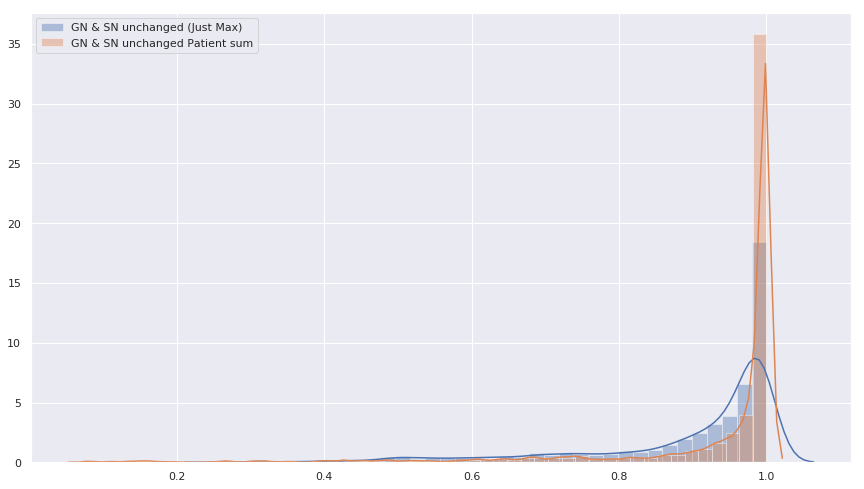

In [185]:
sns.set_style('darkgrid')
sns.distplot(TotProb00[:,0],label="GN & SN unchanged (Just Max)",norm_hist=True)#,fit=stats.halfgennorm,kde=False)
#sns.distplot(TotProb00[:-60,0],label="No Change1")
sns.distplot(PTotProb00[:,0],label="GN & SN unchanged Patient sum",norm_hist=True)#,fit=stats.halfgennorm,kde=False)
#sns.distplot(TotProb22[:,0],label="GN & SN random from outside",norm_hist=True)
plt.legend()

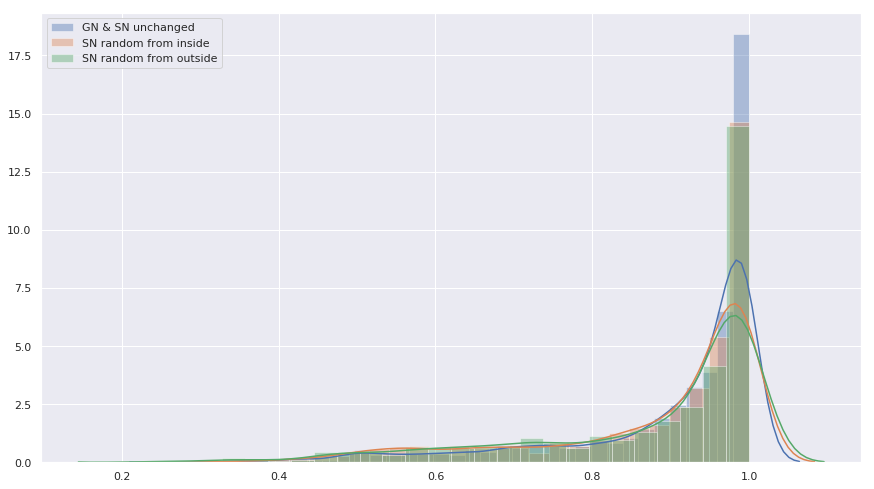

In [187]:
sns.set_style('darkgrid')
sns.distplot(TotProb00[:,0],label="GN & SN unchanged",norm_hist=True)#,fit=stats.halfgennorm,kde=False)
#sns.distplot(TotProb00[:-60,0],label="No Change1")
sns.distplot(TotProb01[:,0],label="SN random from inside",norm_hist=True)#,fit=stats.halfgennorm,kde=False)
sns.distplot(TotProb02[:,0],label="SN random from outside",norm_hist=True)
plt.legend()

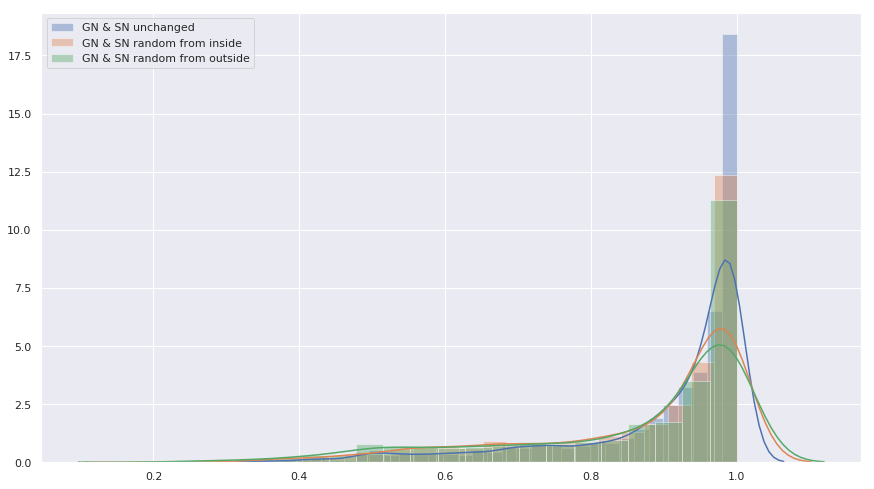

In [186]:
sns.set_style('darkgrid')
sns.distplot(TotProb00[:,0],label="GN & SN unchanged",norm_hist=True)#,fit=stats.halfgennorm,kde=False)
#sns.distplot(TotProb00[:-60,0],label="No Change1")
sns.distplot(TotProb11[:,0],label="GN & SN random from inside",norm_hist=True)#,fit=stats.halfgennorm,kde=False)
sns.distplot(TotProb22[:,0],label="GN & SN random from outside",norm_hist=True)
plt.legend()

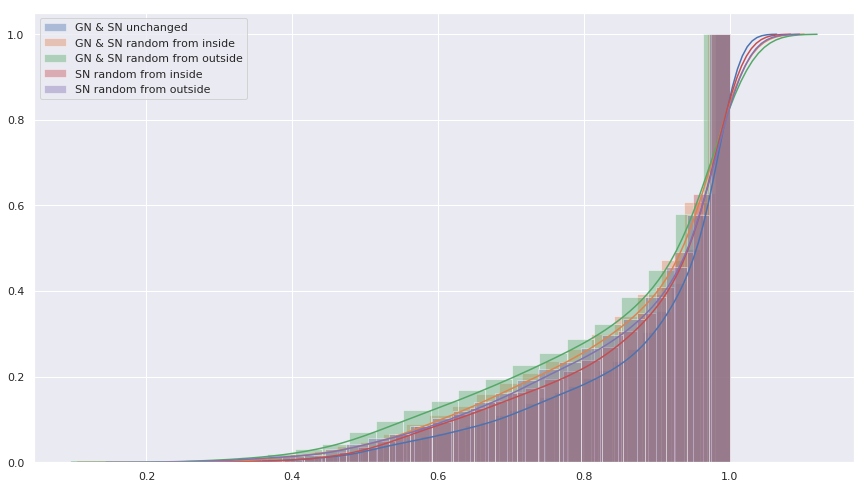

In [183]:
sns.set_style('darkgrid')
sns.distplot(TotProb00[:,0],label="GN & SN unchanged"\
             ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
#sns.distplot(TotProb00[:-60,0],label="No Change1"\
#             ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(TotProb11[:,0],label="GN & SN random from inside"\
            ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(TotProb22[:,0],label="GN & SN random from outside"\
            ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(TotProb01[:,0],label="SN random from inside"\
            ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(TotProb02[:,0],label="SN random from outside"\
            ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
plt.legend()

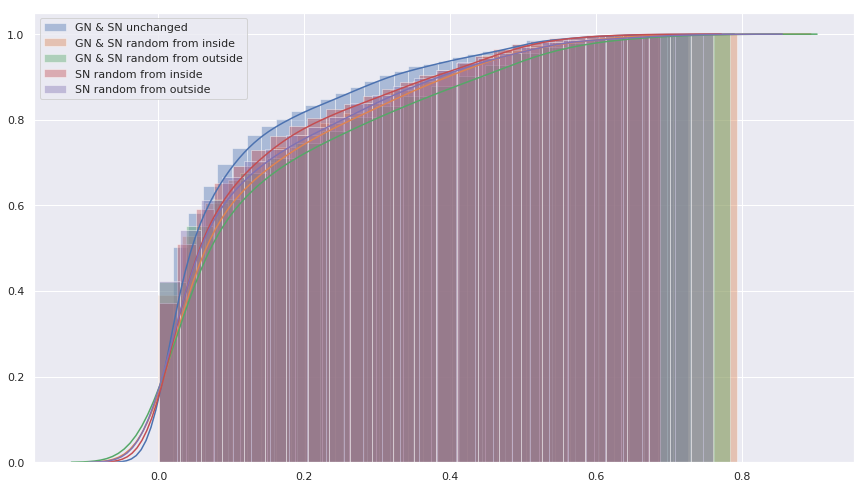

In [184]:
sns.set_style('darkgrid')
sns.distplot(1-TotProb00[:,0],label="GN & SN unchanged"\
             ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
#sns.distplot(TotProb00[:-60,0],label="No Change1"\
#             ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(1-TotProb11[:,0],label="GN & SN random from inside"\
            ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(1-TotProb22[:,0],label="GN & SN random from outside"\
            ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(1-TotProb01[:,0],label="SN random from inside"\
            ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(1-TotProb02[:,0],label="SN random from outside"\
            ,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
plt.legend()

In [229]:
TotProb00 = np.array(TotProb00,dtype=object)
TotProb00[:,1] = TotProb00[:,1].astype(int)
TotProb01 = np.array(TotProb01,dtype=object)
TotProb01[:,1] = TotProb01[:,1].astype(int)
TotProb02 = np.array(TotProb02,dtype=object)
TotProb02[:,1] = TotProb02[:,1].astype(int)
TotProb11 = np.array(TotProb11,dtype=object)
TotProb11[:,1] = TotProb11[:,1].astype(int)
TotProb22 = np.array(TotProb22,dtype=object)
TotProb22[:,1] = TotProb22[:,1].astype(int)

# The following was done on No separation and 385 to make sure things are consistant, where 01 was actually the No separation data.

In [36]:
TEST = []
for i,Labels in enumerate(OxC00):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA00[i][msk]).shape[0]!=0):
        for i2 in OxA00[i][msk]:
            TEST.append([np.max(np.exp(i2))/np.sum(np.exp(i2)),i])
        #print("HIGH")

In [37]:
TEST1=[]
for i,Labels in enumerate(OxC01):
    msk = [(el==15) or (el==38) or (el==61) or (el==85) for el in Labels]
    if((OxA01[i][msk]).shape[0]!=0):
        for i2 in OxA01[i][msk]:
            TEST1.append([np.max(np.exp(i2))/np.sum(np.exp(i2)),i])
        #print("HIGH")

In [38]:
len(TEST),len(TEST1)

(1652, 1652)

In [39]:
for i,_ in enumerate(TEST):
    if TEST[i][0]!=TEST1[i][0]:
        print(i,TEST[i],TEST1[i])

315 [0.9268477, 5339] [0.9599964, 5312]
316 [0.6943307, 5339] [0.48772612, 5312]
317 [0.982308, 5339] [0.98238784, 5312]
1344 [0.75545454, 25680] [0.8730638, 25383]
1345 [0.71635205, 25680] [0.6127569, 25383]
1534 [0.9990644, 28228] [0.9989996, 27885]


In [42]:
OxC00[5339]

[15, 61, 38, 69, 69, 69, 16, 62, 62, 62, 39, 69]

In [41]:
OxC01[5312]

[15, 61, 38, 69, 69, 69, 16, 62, 62, 62, 39]

In [45]:
C00breaks

[169,
 221,
 262,
 311,
 352,
 389,
 436,
 469,
 557,
 642,
 734,
 830,
 919,
 1031,
 1196,
 1251,
 1365,
 1453,
 1479,
 1504,
 1533,
 1571,
 1660,
 1705,
 1785,
 1848,
 1879,
 1964,
 2038,
 2095,
 2142,
 2169,
 2212,
 2269,
 2303,
 2452,
 2498,
 2539,
 2574,
 2613,
 2702,
 2853,
 2873,
 2934,
 3033,
 3222,
 3358,
 3386,
 3519,
 3552,
 3671,
 3799,
 3834,
 4013,
 4050,
 4119,
 4185,
 4218,
 4251,
 4317,
 4591,
 4674,
 4728,
 4778,
 4840,
 4916,
 4971,
 5003,
 5033,
 5103,
 5136,
 5182,
 5228,
 5340,
 5376,
 5481,
 5568,
 5601,
 5639,
 5738,
 5881,
 5903,
 6016,
 6035,
 6078,
 6112,
 6153,
 6174,
 6209,
 6268,
 6349,
 6393,
 6505,
 6660,
 6732,
 6766,
 6835,
 6880,
 7059,
 7128,
 7179,
 7214,
 7298,
 7357,
 7419,
 7455,
 7503,
 7573,
 7590,
 7630,
 7725,
 7765,
 7791,
 7858,
 7909,
 7953,
 7981,
 8068,
 8152,
 8250,
 8377,
 8483,
 8565,
 8618,
 8792,
 8880,
 8916,
 8950,
 9046,
 9110,
 9254,
 9397,
 9455,
 9489,
 9526,
 9564,
 9629,
 9651,
 9732,
 9791,
 9830,
 9944,
 10009,
 10136,
 10

In [81]:
len(C00breaks)

406

In [83]:
len(Dic00)

521

In [72]:
for n in [0,1,2]:
    for i in range(len(OxA[n])):
        print(np.max(np.exp(OxA[n][i]))/np.sum(np.exp((OxA[n][i]))))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 14

In [44]:
for n,i in enumerate(OxC00):
    if len(i)>300 and len(i)!=385:
        print(n)

1251
1479
5481
5568
6349
7630
8377
9732
9791
15653
16420
16648
18670
19702
21509
23019
23399
24963
25725
26607
28147
29462
30386
30550


In [123]:
TEST=0
for i,c in enumerate(OxC00):
    TEST = TEST + (len(c))
TEST

521357

In [50]:
TESTA=np.load("NeuroNER-master/src/SalmanTest/Mr1mainSalmanUnary_scorestest.npy")
TESTB=np.load("NeuroNER-master/src/SalmanTest/Mr1mainSalmanCCCtest.npy")

In [64]:
TESTB[3]

[6, 52, 52, 29]

In [62]:
OxC00[3]

[69, 69, 69, 85]

In [69]:
TokFil00[3].split('\n')

['Younger 221-01 66 73 O',
 ', 221-01 73 74 O',
 'T 221-01 75 76 O',
 'Eugene 221-01 77 83 O']

In [74]:
TokFil00[169].split("\n")

['aa 221-01 10518 10520 O',
 'aa 221-01 10521 10523 O',
 'aa 221-01 10524 10526 O',
 'aa 221-01 10527 10529 O',
 'aa 221-01 10530 10532 O',
 'aa 221-01 10533 10535 O',
 'aa 221-01 10536 10538 O',
 'aa 221-01 10539 10541 O',
 'aa 221-01 10542 10544 O',
 'aa 221-01 10545 10547 O',
 'aa 221-01 10548 10550 O',
 'aa 221-01 10551 10553 O',
 'aa 221-01 10554 10556 O',
 'aa 221-01 10557 10559 O',
 'aa 221-01 10560 10562 O',
 'aa 221-01 10563 10565 O',
 'aa 221-01 10566 10568 O',
 'aa 221-01 10569 10571 O',
 'aa 221-01 10572 10574 O',
 'aa 221-01 10575 10577 O',
 'aa 221-01 10578 10580 O',
 'aa 221-01 10581 10583 O',
 'aa 221-01 10584 10586 O',
 'aa 221-01 10587 10589 O',
 'aaaa 221-01 10590 10594 O',
 'aa 221-01 10595 10597 O',
 'aa 221-01 10598 10600 O',
 'aa 221-01 10601 10603 O',
 'aa 221-01 10604 10606 O',
 'aa 221-01 10607 10609 O',
 'aa 221-01 10610 10612 O',
 'aa 221-01 10613 10615 O',
 'aa 221-01 10616 10618 O',
 'aa 221-01 10619 10621 O',
 'aa 221-01 10622 10624 O',
 'aa 221-01 10625 

In [72]:
C00breaks

[169,
 221,
 262,
 311,
 352,
 389,
 436,
 469,
 557,
 642,
 734,
 830,
 919,
 1031,
 1196,
 1251,
 1365,
 1453,
 1479,
 1504,
 1533,
 1571,
 1660,
 1705,
 1785,
 1848,
 1879,
 1964,
 2038,
 2095,
 2142,
 2169,
 2212,
 2269,
 2303,
 2452,
 2498,
 2539,
 2574,
 2613,
 2702,
 2853,
 2873,
 2934,
 3033,
 3222,
 3358,
 3386,
 3519,
 3552,
 3671,
 3799,
 3834,
 4013,
 4050,
 4119,
 4185,
 4218,
 4251,
 4317,
 4591,
 4674,
 4728,
 4778,
 4840,
 4916,
 4971,
 5003,
 5033,
 5103,
 5136,
 5182,
 5228,
 5340,
 5376,
 5481,
 5568,
 5601,
 5639,
 5738,
 5881,
 5903,
 6016,
 6035,
 6078,
 6112,
 6153,
 6174,
 6209,
 6268,
 6349,
 6393,
 6505,
 6660,
 6732,
 6766,
 6835,
 6880,
 7059,
 7128,
 7179,
 7214,
 7298,
 7357,
 7419,
 7455,
 7503,
 7573,
 7590,
 7630,
 7725,
 7765,
 7791,
 7858,
 7909,
 7953,
 7981,
 8068,
 8152,
 8250,
 8377,
 8483,
 8565,
 8618,
 8792,
 8880,
 8916,
 8950,
 9046,
 9110,
 9254,
 9397,
 9455,
 9489,
 9526,
 9564,
 9629,
 9651,
 9732,
 9791,
 9830,
 9944,
 10009,
 10136,
 10